<a href="https://colab.research.google.com/github/igorgcgv/leitor_digitos_manuscrito/blob/main/Modelo_Leitor_de_Digitos_Manuscrito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#Importando as Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC



In [52]:
#Carregando o Dataset

mnist = fetch_openml('mnist_784', as_frame=False)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [53]:
# Separando em X e Y

X, y = mnist.data, mnist.target


In [54]:
# Verificando o tamanho do dataset

X.shape,y.shape

((70000, 784), (70000,))

In [55]:
# Contar o número de ocorrências de cada classe

classes, counts = np.unique(y, return_counts=True)

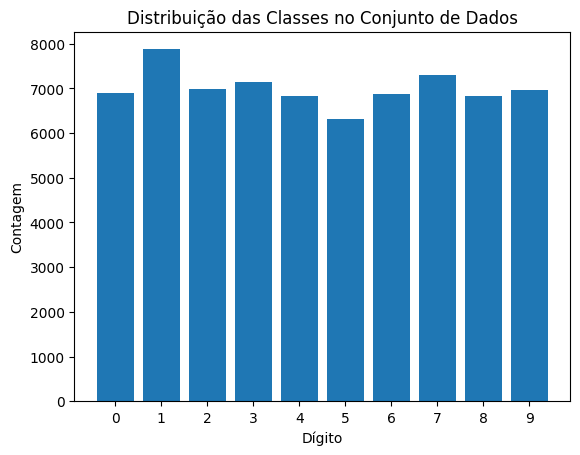

In [56]:


# Plotar gráfico de barras da distribuição das classes
plt.bar(classes, counts)
plt.xticks(classes)
plt.xlabel('Dígito')
plt.ylabel('Contagem')
plt.title('Distribuição das Classes no Conjunto de Dados')
plt.show()


Como podemos ver as classes estão relativamente balanceadas.

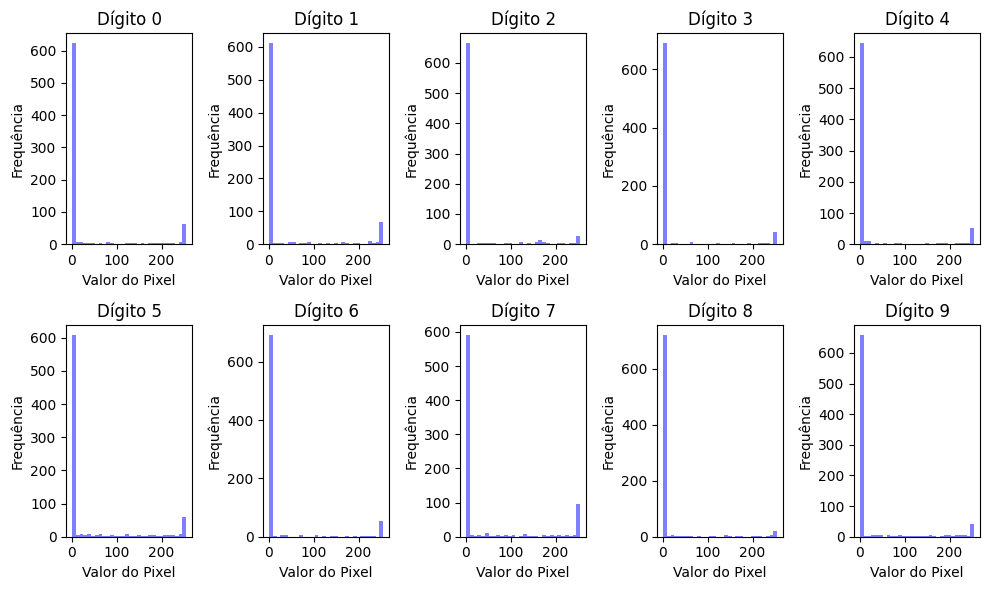

In [57]:
# Extrair os valores de pixel das imagens
pixel_values = X.reshape(-1, 28*28)  # Transformar as imagens em uma matriz (número de imagens, 28*28)

# Transformar os valores de pixel em um DataFrame do Pandas
df_pixel_values = pd.DataFrame(pixel_values, columns=[f"pixel_{i}" for i in range(28*28)])

# Visualizar a distribuição dos valores de pixel usando histogramas
plt.figure(figsize=(10, 6))
for i in range(10):  # Visualizar para os 10 primeiros dígitos
    plt.subplot(2, 5, i+1)
    plt.hist(df_pixel_values.iloc[i], bins=30, color='blue', alpha=0.5)
    plt.title(f"Dígito {i}")
    plt.xlabel("Valor do Pixel")
    plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

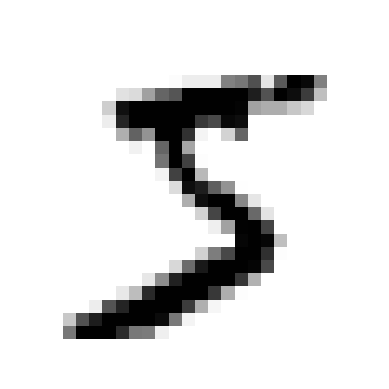

In [58]:
#Verificando o Primeiro digito do dataset


def plot_digit(image_data):
 image = image_data.reshape(28, 28)
 plt.imshow(image, cmap="binary")
 plt.axis("off")
some_digit = X[0]
plot_digit(some_digit)
plt.show()


In [59]:

#Dividindo o dataset em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)


In [60]:
# Instanciando o modelo
svm_clf = SVC(C=1, random_state=42)

In [61]:
# Padronizando as features de entrada

scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))


In [62]:
# Treinamento do modelo

svm_clf.fit(X_train_scaled, y_train)

SVC(C=1, random_state=42)

In [63]:
# Validação Cruzada para aferição da accuracy

cross_val_score(svm_clf, X_train_scaled, y_train, cv=3,
scoring="accuracy")


array([0.95861393, 0.96038695, 0.95787669])

In [64]:
# Predict

y_train_pred = cross_val_predict(svm_clf, X_train_scaled,
y_train, cv=3)


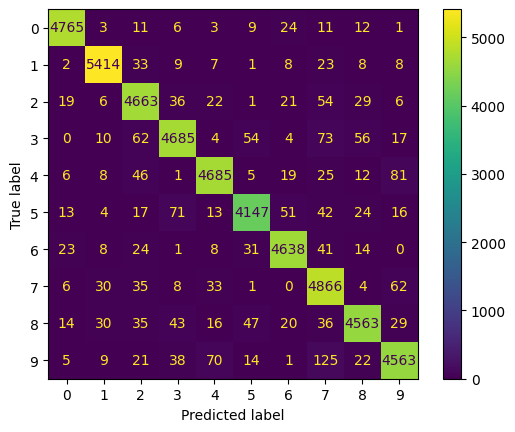

In [65]:
# Matriz de Confusão

#Verificamos que há uma quantidade razoavel de má predição do valor '7' confundindo com o '9'
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

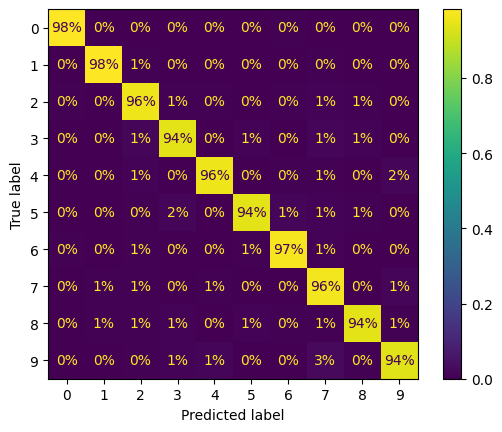

In [66]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,normalize="true",values_format=".0%")
plt.show()


In [67]:
#Testando o Algoritimo construido

some_digit = X_train_scaled[-1]

In [68]:
#Predict no digito

svm_clf.predict([some_digit])

array(['0'], dtype=object)

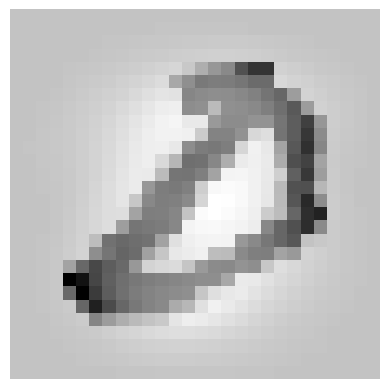

In [69]:
# Visualizando o Digito

import matplotlib.pyplot as plt
def plot_digit(image_data):
 image = image_data.reshape(28, 28)
 plt.imshow(image, cmap="binary")
 plt.axis("off")
#some_digit = X[0]
plot_digit(some_digit)
plt.show()


Conferindo a Lógica que o modelo empresa para inferir qual seria o digito predito

In [70]:
#Conferindo a Lógica que o modelo empresa para inferir qual seria o digito predito
#cada linha se refere a algum digito
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [71]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)


array([[ 9.31,  2.71,  8.3 ,  6.29, -0.31,  4.26,  5.06,  0.69,  7.3 ,
         1.69]])

In [72]:
class_id = some_digit_scores.argmax()
class_id

0